# ⚡️study by 석민⚡️

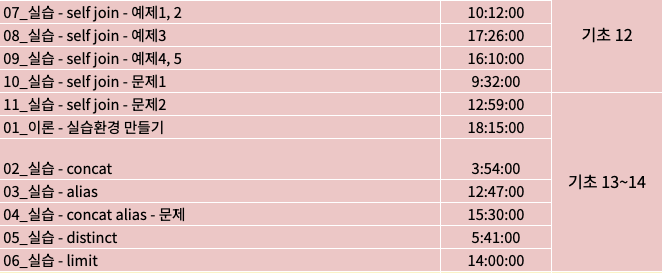

# SELF JOIN

In [ ]:
# celeb 테이블의 연예인 중, snl_show 에 host 로 출연했고 소속사가 안테나인 사람의 이름과 직업을 검색
SELECT celeb.NAME, celeb.JOB_TITLE
FROM celeb, snl_show
WHERE celeb.NAME = snl_show.HOST
AND celeb.AGENCY='안테나';

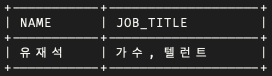

In [ ]:
# celeb 테이블의 연예인 중,
# snl_show 에 host 로 출연했고,
# 영화배우는 아니면서 YG 엔터테이먼트 소속이거나 40세 이상이면서 YG 엔터테이먼트 소속이 아닌
# 연예인의 이름과 나이, 직업, 소속사, 시즌, 에피소드 정보를 검색

SELECT c.NAME, c.JOB_TITLE, c.AGENCY, s.SEASON, s.EPISODE
FROM celeb c, snl_show s
WHERE c.NAME = s.HOST
AND ((NOT c.JOB_TITLE LIKE '%영화배우%' AND c.AGENCY ='YG엔터테이먼트')
    OR (c.AGE >= 40 AND c.AGENCY != 'YG엔터테이먼트'));


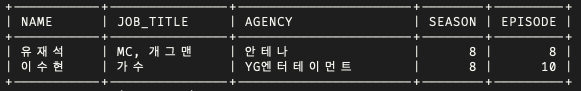

In [ ]:
# snl_show 에 출연한 연예인의 snl_show 아이디, 시즌, 에피소드, 이름, 직업 정보를 검색

SELECT s.ID, s.SEASON, s.EPISODE, c.NAME, c.JOB_TITLE
FROM celeb c, snl_show s
WHERE c.NAME = s.HOST;

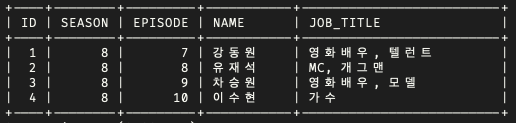

In [ ]:
# snl_show 에 출연한 celeb 중, 에피소드 7, 9, 10 중에 출연했거나
# 소속사가 YG로 시작하고 뒤에 6글자로 끝나는 사람 중 작년 9월15일 이후에 출연했던 사람을 검색


SELECT c.NAME, s.SEASON, s.EPISODE, s.BROADCAST_DATE, c.AGENCY
FROM celeb c, snl_show s
WHERE c.NAME = s.HOST
AND s.EPISODE IN (7, 9, 10)
AND c.AGENCY LIKE 'YG______%'
AND s.BROADCAST_DATE > '2020-09-15';

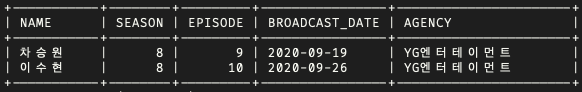

# CONCAT
- 여러 문자열을 하나로 합치거나 연결

In [ ]:
SELECT CONCAT('이름: ', NAME) FROM celeb;

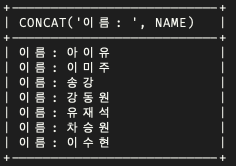

# ALIAS
- 칼럼이나 테이블 이름에 별칭 생성

In [ ]:
SELECT name as '이름'
FROM celeb;

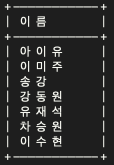

In [ ]:
# name 은 이름으로, agency 는 소속사로 별칭을 만들어서 검색
SELECT name as '이름', agency as '소속사'
FROM celeb;

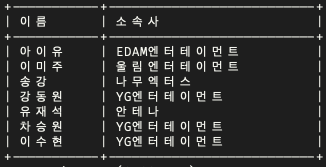

In [ ]:
# name 과 job_title 을 합쳐서 profile 이라는 별칭을 만들어서 검색

SELECT CONCAT(name, ': ', job_title) as 'profile'
FROM celeb;

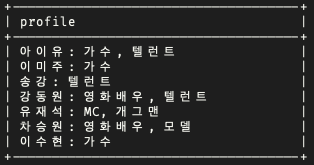

In [ ]:
# snl_korea 에 출연한 celeb 을 기준으로 두 테이블을 조인하여,
# celeb 테이블은 c, snl_show 테이블은 s 라는 별칭을 만들어서 출연한 시즌과 에피소드, 이름, 직업을 검색

SELECT s.season, s.episode, c.name, c.job_title
FROM celeb c INNER JOIN snl_show s
ON c.name = s.host;

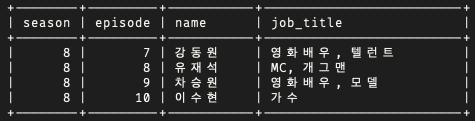

In [ ]:
# snl_korea 에 출연한 celeb 을 기준으로 두 테이블을 조인하여 다음과 같이 각 데이터의 별칭을 사용하여 검색
# • 시즌, 에피소드, 방송일을 합쳐서 ‘방송정보’
# • 이름, 직업을 합쳐서 ‘출연자정보’

SELECT CONCAT(s.season, '-', s.episode, '(', s.broadcast_date,')') '방송정보', 
       CONCAT(c.name, ': ', c.job_title) '출연자정보'
FROM celeb c INNER JOIN snl_show s
ON c.name = s.host;

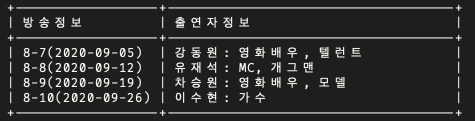

### 예제)

- 이름이 3글자인 연예인 정보를 검색하여 다음과 같이 출력하세요.


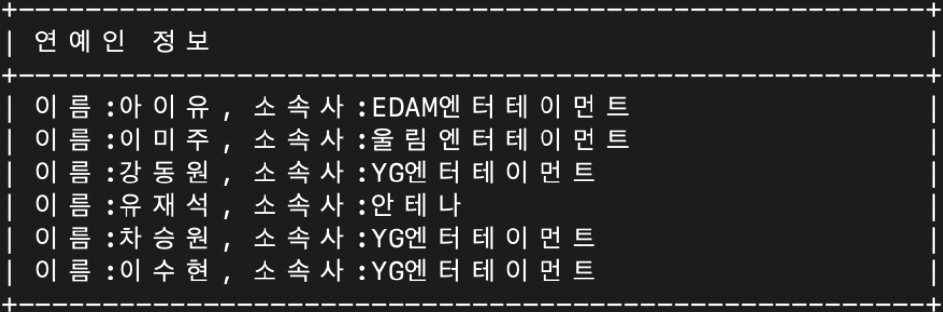

In [ ]:
SELECT CONCAT('이름: ', name, ', ', '소속사: ', agency) '연예인 정보'
FROM celeb
WHERE name LIKE '___';

- 앞글자가 2글자이고, ‘엔터테이먼트’ 로 끝나는 소속사 연예인 중
- SNL 에 출연한 연예인의 신상정보(나이, 성별)와 출연정보(시즌-에피소드, 방송날짜), 소속사 정보를
- 방송날짜 최신순으로 정렬하여 다음과 같이 검색하세요

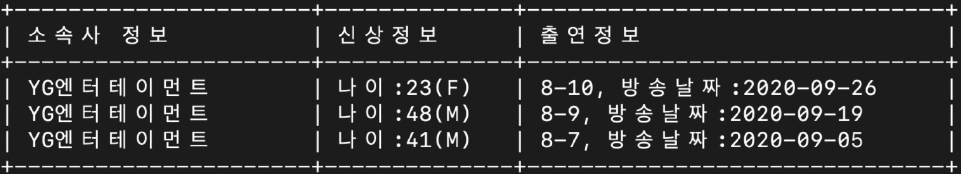

In [ ]:
SELECT c.agency '소속사 정보', CONCAT('나이: ', c.age, '(', c.sex, ')') '신상성보',
      CONCAT(s.season,'-',s.episode, ', 방송날짜: ', s.broadcast_date) '출연정보'
FROM celeb c INNER JOIN snl_show s
ON c.name = s.host
WHERE c.agency LIKE '__엔터테이먼트'
ORDER BY s.broadcast_date DESC;

# DISTINCT 
- 검색한 결과의 중복 제거

In [ ]:
# celeb 테이블에서 성별과 소속사 별 종류를 검색하여 성별, 소속사 순으로 정렬하세요.

SELECT DISTINCT sex, agency
FROM celeb
ORDER BY sex, agency;

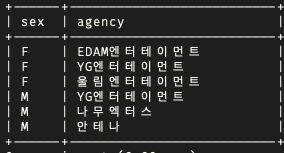

# LIMIT
- 검색결과를 정렬된 순으로 주어진 숫자만큼만 조회

In [ ]:
# celeb 테이블에서 남자 연예인 중 나이가 가장 많은 2명을 조회하세요.
SELECT name, age
FROM celeb
ORDER BY age DESC
LIMIT 2;

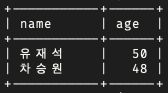

In [ ]:
# SNL에 출연한 연예인의 정보를 최신 방송날짜 순으로 2개만 검색하여 다음과 같이 출력하세요.
SELECT CONCAT('SNL 시즌', s.season,' 에피소드', s.episode, ' 호스트 - ', s.host) 'SNL 방송정보',
        c.age
FROM celeb c INNER JOIN snl_show s
ON c.name = s.host
ORDER BY s.broadcast_date DESC
LIMIT 2;

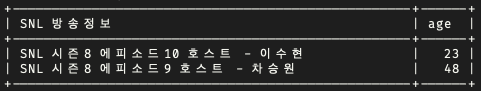